This notebook will go through the strategic grouping phase of competitive analysis to define the strategic groups within the automotive industry in india using a mathematical methodology.

The main objective of this report is to be able to identify the strategic group of a car given a set of features to that car.

The Car we want to identify the strategic group for is Toyota Corolla which is known as Corolla Altis in india

# Approach

This report will follow a mathematical approach using a method called clustring to achive the objective of identifying strategic group.

So for a car company it's really a challenge to identify its strategic group as it really takes a lot of effort to put all variable in consideration.

# Exploratory Data analysis

In [1]:
# import libraries

In [2]:

import numpy as np

import pandas as pd
pd.set_option('display.max_columns',40)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');

In [3]:
# loading data and cleaning data

In [4]:
df=pd.read_csv('cars_ds_final.csv')
df.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,...,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,15 litres,CNG,1652 mm,3164 mm,1750 mm,Hatchback,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.sample(8)

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,...,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
841,841,Porsche,Cayenne,Turbo,"Rs. 1,92,10,000",3996 cc,6.0,4.0,AWD (All Wheel Drive),V,BS 6,"Front, Transverse",Injection,90 litres,Petrol,1673 mm,4926 mm,1983 mm,SUV,5.0,...,Cup Holders,Yes,Yes,Yes,2.4 PSI,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
932,932,Maruti Suzuki,Ertiga,Zxi Plus,"Rs. 9,71,000",1462 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,45 litres,Petrol,1690 mm,4395 mm,1735 mm,MUV,5.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,1003,Mg,Hector,1.5L Smart Hybrid,"Rs. 14,98,000",1500 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,NaN,Hybrid,1760 mm,4655 mm,1835 mm,SUV,5.0,...,NaN,NaN,Yes,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
131,131,Hyundai,Elite I20,Sportz Plus Cvt,"Rs. 8,31,693",1197 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,45 litres,Petrol,1505 mm,3985 mm,1734 mm,Hatchback,5.0,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
784,784,Volvo,S60 Cross Country,D4,"Rs. 44,26,500",2400 cc,5.0,4.0,AWD (All Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,67 litres,Diesel,1539 mm,4637 mm,2097 mm,"Sedan, Crossover",4.0,...,Cup Holders,Yes,Yes,NaN,NaN,Only front,Yes,Yes,Yes,Yes,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1189,1189,Tata,Tiago Nrg,1.2L Revotron Amt,"Rs. 6,39,993",1199 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,35 litres,Petrol,1587 mm,3793 mm,1665 mm,Crossover,5.0,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1214,1214,Land Rover,Discovery,3.0 Hse Luxury Diesel,"Rs. 1,08,61,088",2993 cc,6.0,4.0,4WD,V,BS IV,"Front, Longitudinal",Injection,85 litres,Diesel,1846 mm,4988 mm,2200 mm,SUV,5.0,...,Cup Holders,Yes,Yes,Yes,NaN,All,Yes,Yes,Yes,Yes,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
640,640,Maruti Suzuki,Xl6,Alpha At,"Rs. 11,51,189",1462 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,45 litres,Petrol,1700 mm,4445 mm,1775 mm,MPV,5.0,...,NaN,NaN,Yes,Yes,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


# showning important features regarding the dataset

In [6]:
l_D=len(df)
c_m=len(df.Make.unique())
c_c=len(df.Model.unique())
n_f=len(df.columns)
fig=px.bar(x=['Observations','Makers','Models','Features'],y=[l_D,c_m,c_c,n_f],width=800,height=400)
fig.update_layout(title="Dataset Statistics",xaxis_title=" ",yaxis_title="Counts",font=dict(size=16))
fig.show()

Since the dataset is full of features, we will choose only a subset of useful features to work with, also we will clean the data to extract useful information

In [7]:
df['car'] = df.Make + ' ' + df.Model
c = ['Make','Model','car','Variant','Body_Type','Fuel_Type','Fuel_System','Type','Drivetrain','Ex-Showroom_Price','Displacement','Cylinders',
     'ARAI_Certified_Mileage','Power','Torque','Fuel_Tank_Capacity','Height','Length','Width','Doors','Seating_Capacity','Wheelbase','Number_of_Airbags']
df_full = df.copy()
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace(',','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].astype(int)
df = df[c]
df = df[~df.ARAI_Certified_Mileage.isnull()]
df = df[~df.Make.isnull()]
df = df[~df.Width.isnull()]
df = df[~df.Cylinders.isnull()]
df = df[~df.Wheelbase.isnull()]
df = df[~df['Fuel_Tank_Capacity'].isnull()]
df = df[~df['Seating_Capacity'].isnull()]
df = df[~df['Torque'].isnull()]
df['Height'] = df['Height'].str.replace(' mm','',regex=False).astype(float)
df['Length'] = df['Length'].str.replace(' mm','',regex=False).astype(float)
df['Width'] = df['Width'].str.replace(' mm','',regex=False).astype(float)
df['Wheelbase'] = df['Wheelbase'].str.replace(' mm','',regex=False).astype(float)
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].str.replace(' litres','',regex=False).astype(float)
df['Displacement'] = df['Displacement'].str.replace(' cc','',regex=False)
df.loc[df.ARAI_Certified_Mileage == '9.8-10.0 km/litre','ARAI_Certified_Mileage'] = '10'
df.loc[df.ARAI_Certified_Mileage == '10kmpl km/litre','ARAI_Certified_Mileage'] = '10'
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace(' km/litre','',regex=False).astype(float)
df.Number_of_Airbags.fillna(0,inplace= True)
df['price'] = df['Ex-Showroom_Price'] * 0.014
df.drop(columns='Ex-Showroom_Price', inplace= True)
df.price = df.price.astype(int)
HP = df.Power.str.extract(r'(\d{1,4}).*').astype(int) * 0.98632
HP = HP.apply(lambda x: round(x,2))
TQ = df.Torque.str.extract(r'(\d{1,4}).*').astype(int)
TQ = TQ.apply(lambda x: round(x,2))
df.Torque = TQ
df.Power = HP
df.Doors = df.Doors.astype(int)
df.Seating_Capacity = df.Seating_Capacity.astype(int)
df.Number_of_Airbags = df.Number_of_Airbags.astype(int)
df.Displacement = df.Displacement.astype(int)
df.Cylinders = df.Cylinders.astype(int)
df.columns = ['make', 'model','car', 'variant', 'body_type', 'fuel_type', 'fuel_system','type', 'drivetrain', 'displacement', 'cylinders',
              'mileage', 'power', 'torque', 'fuel_tank','height', 'length', 'width', 'doors', 'seats', 'wheelbase','airbags', 'price']

In [8]:
df

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
0,Tata,Nano Genx,Tata Nano Genx,Xt,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),624,2,23.60,37.48,51,24.0,1652.0,3164.0,1750.0,5,4,2230.0,0,4097
1,Tata,Nano Genx,Tata Nano Genx,Xe,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),624,2,23.60,37.48,51,24.0,1652.0,3164.0,1750.0,5,4,2230.0,0,3310
3,Tata,Nano Genx,Tata Nano Genx,Xta,Hatchback,Petrol,Injection,Automatic,RWD (Rear Wheel Drive),624,2,21.90,37.48,51,24.0,1652.0,3164.0,1750.0,5,4,2230.0,0,4686
4,Tata,Nano Genx,Tata Nano Genx,Xm,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),624,2,23.60,37.48,51,24.0,1652.0,3164.0,1750.0,5,4,2230.0,0,3811
5,Tata,Nano Genx,Tata Nano Genx,Xma,Hatchback,Petrol,Injection,Automatic,RWD (Rear Wheel Drive),624,2,21.90,37.48,51,24.0,1652.0,3164.0,1750.0,5,4,2230.0,0,4407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Honda City,Vx Mt Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1498,4,25.10,98.63,200,40.0,1495.0,4440.0,1695.0,4,5,2600.0,2,18228
1272,Honda,City,Honda City,Zx Mt Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1498,4,25.10,98.63,200,40.0,1495.0,4440.0,1695.0,4,5,2600.0,6,19894
1273,Honda,City,Honda City,Zx Cvt Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1497,4,22.60,117.37,145,40.0,1495.0,4440.0,1695.0,4,5,2600.0,6,20034
1274,Honda,City,Honda City,V Cvt Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1497,4,17.80,117.37,145,40.0,1495.0,4440.0,1695.0,4,5,2600.0,2,16814


In [9]:
df.sample(6)

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
1027,Volvo,V40 Cross Country,Volvo V40 Cross Country,D3,Hatchback,Diesel,Injection,Automatic,FWD (Front Wheel Drive),1984,5,16.80,147.95,350,60.0,1458.0,4370.0,1783.0,5,5,2646.0,7,45962
379,Maruti Suzuki,Celerio,Maruti Suzuki Celerio,Vxi At,Hatchback,Petrol,Injection,Automatic,FWD (Front Wheel Drive),998,3,23.10,67.07,90,35.0,1560.0,3600.0,1600.0,5,5,2425.0,0,7113
502,Hyundai,Venue,Hyundai Venue,1.4 Crdi Mt Sx(O),SUV,Diesel,Injection,Manual,FWD (Front Wheel Drive),1397,4,23.70,88.77,22,45.0,1590.0,3995.0,1770.0,5,5,2500.0,6,15246
739,Toyota,Corolla Altis,Toyota Corolla Altis,Vl At Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1798,4,16.70,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,7,28266
20,Renault,Kwid,Renault Kwid,Rxt (O) 1.0,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),999,3,23.01,67.07,91,28.0,1490.0,3731.0,1579.0,5,5,2422.0,2,6173
612,Volkswagen,Vento,Volkswagen Vento,Highline Plus 1.5 (D) Dsg,Sedan,Diesel,Injection,Automatic,FWD (Front Wheel Drive),1498,4,20.64,103.56,250,55.0,1467.0,4390.0,1699.0,4,5,2553.0,2,18445


# Now we find what is the main features regarding the car

In [10]:
df[df.model =='Corolla Altis']

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
734,Toyota,Corolla Altis,Toyota Corolla Altis,G Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,3,23030
735,Toyota,Corolla Altis,Toyota Corolla Altis,G At Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,3,25284
736,Toyota,Corolla Altis,Toyota Corolla Altis,Gl Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,7,26348
737,Toyota,Corolla Altis,Toyota Corolla Altis,Gl Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1364,4,21.0,86.80,205,43.0,1475.0,4620.0,1775.0,4,5,2700.0,3,27104
738,Toyota,Corolla Altis,Toyota Corolla Altis,G Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1364,4,21.0,86.80,205,43.0,1475.0,4620.0,1775.0,4,5,2700.0,3,24794
739,Toyota,Corolla Altis,Toyota Corolla Altis,Vl At Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,7,28266


We can see that there are 6 variants of the car in the market

First we Check the price distribution, we will use both normal and log scales due to the huge difference in prices.

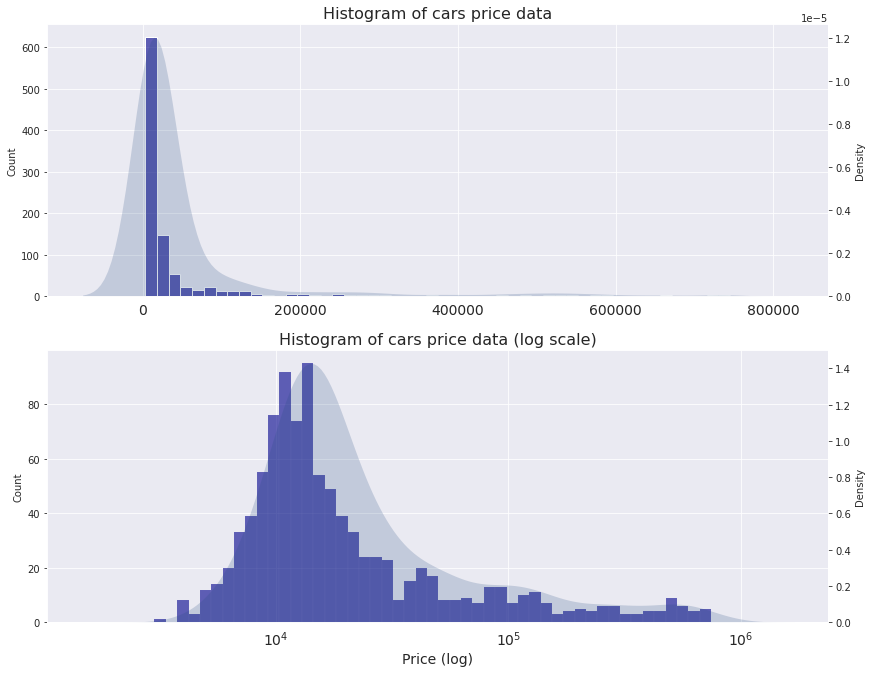

In [11]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(14,11))
sns.histplot(data=df, x='price',bins=50, alpha=.6, color='darkblue', ax=ax1)
ax12 = ax1.twinx()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax12,linewidth=0)
ax12.grid()
ax1.set_title('Histogram of cars price data',fontsize=16)
ax1.set_xlabel('')
logbins = np.logspace(np.log10(3000),np.log10(744944.578),50)
sns.histplot(data=df, x='price',bins=logbins,alpha=.6, color='darkblue',ax=ax2)
ax2.set_title('Histogram of cars price data (log scale)',fontsize=16)
ax2.set_xscale('log')
ax22 = ax2.twinx()
ax22.grid()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax22,log_scale=True,linewidth=0)
ax2.set_xlabel('Price (log)', fontsize=14)
ax22.set_xticks((800,1000,10000,100000,1000000))
ax2.xaxis.set_tick_params(labelsize=14);
ax1.xaxis.set_tick_params(labelsize=14);

Seems like there is a lot of varaince in price we can check that by plotting a box plot

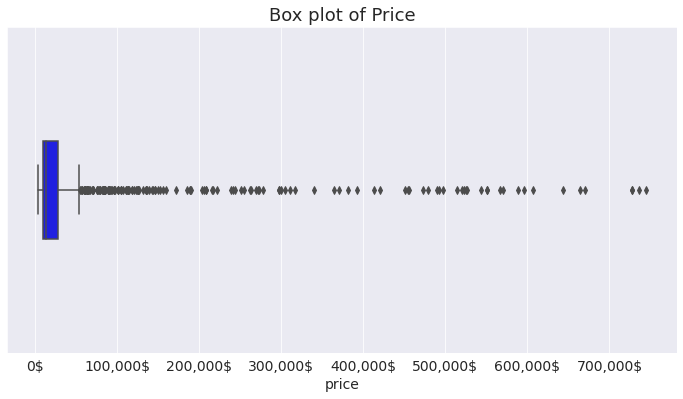

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='price',width=.3,color='blue',hue='fuel_type')
plt.title('Box plot of Price',fontsize=18)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14)
plt.xlabel('price',fontsize=14);

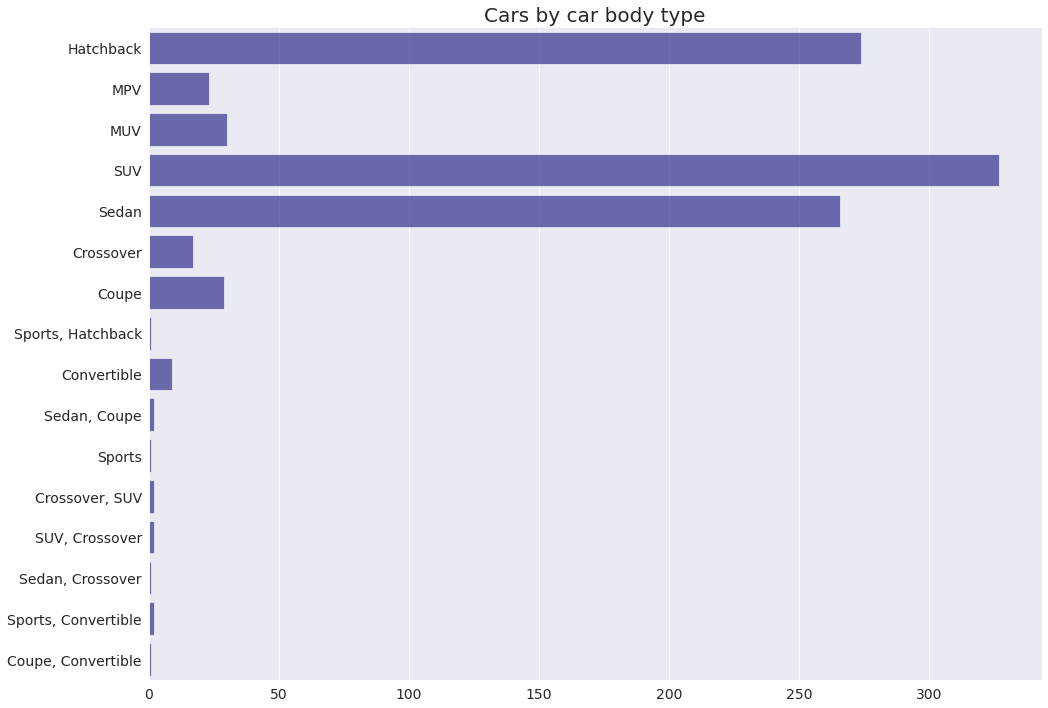

In [13]:
plt.figure(figsize=(16,12))
sns.countplot(data=df,y='body_type',alpha=0.6,color='darkblue')
plt.title('Cars by car body type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

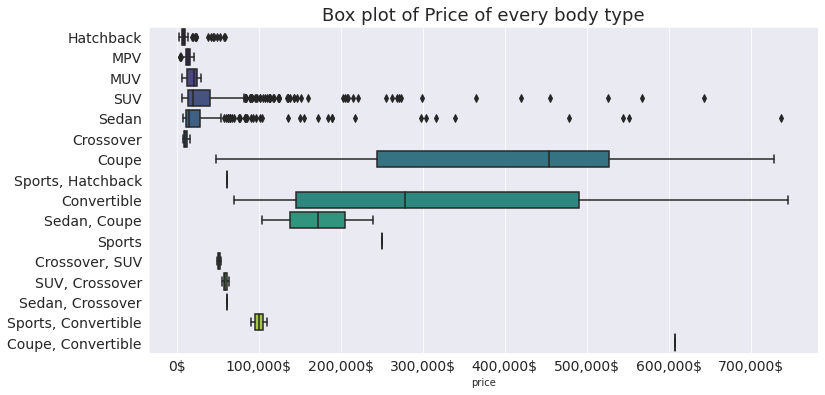

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price', y='body_type', palette='viridis')
plt.title('Box plot of Price of every body type',fontsize=18)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14);

It's Clear that Car body type strongly affect the price

In [15]:
# now we check cars by Fuel Type

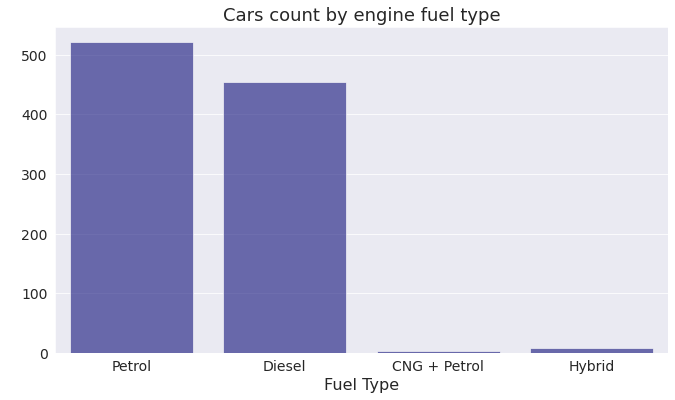

In [16]:
plt.figure(figsize=(11,6))
sns.countplot(data=df,x='fuel_type',alpha=.6,color='darkblue')
plt.title('Cars count by engine fuel type',fontsize=18)
plt.xlabel('Fuel Type',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel(' ');

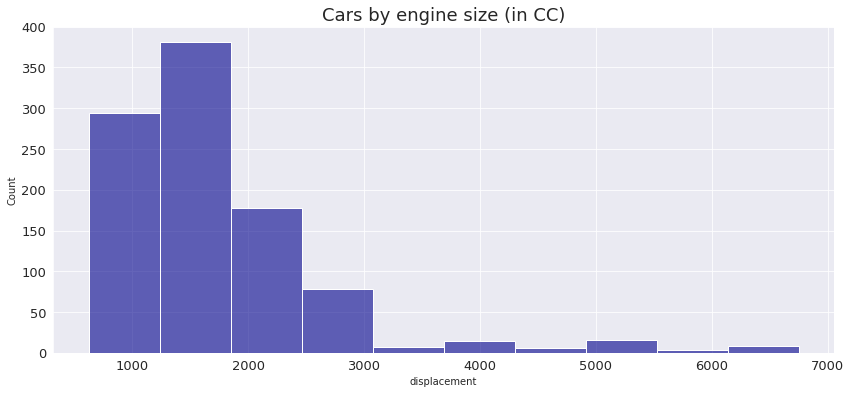

In [17]:
# Now we check car by engine size
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='displacement',alpha=.6, color='darkblue',bins=10)
plt.title('Cars by engine size (in CC)',fontsize=18)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

In [18]:
# Now We check the Horsepower of cars

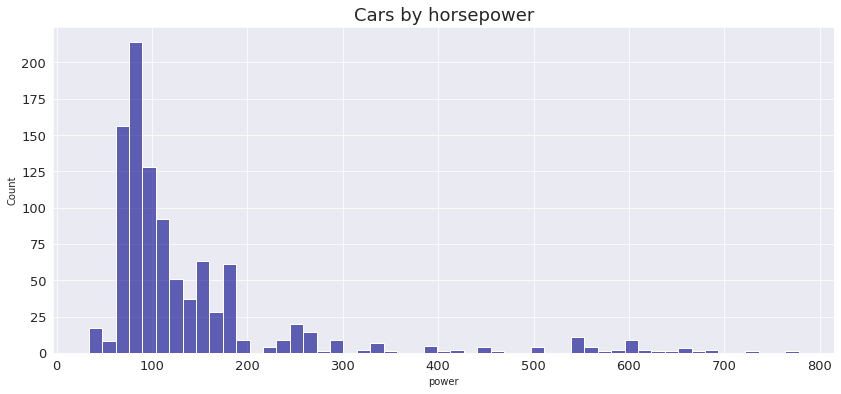

In [19]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='power',alpha=.6, color='darkblue')
plt.title('Cars by horsepower',fontsize=18);
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

# Now we check the relation horsepower and price considering diffrent body type

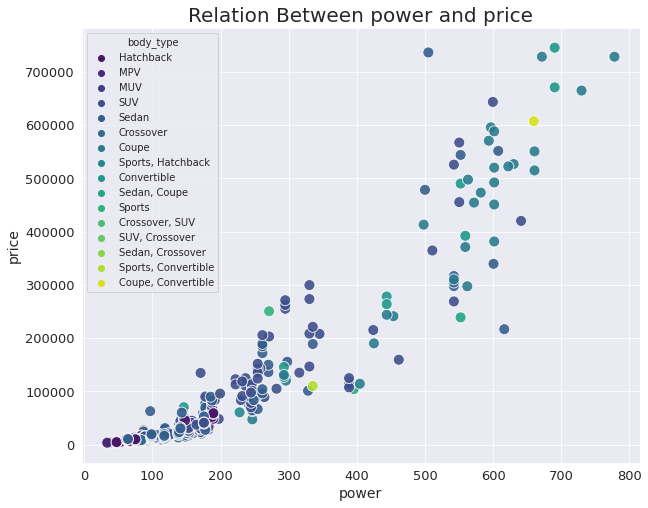

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x='power',y='price',hue='body_type',palette='viridis',alpha=0.89,s=120)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);
plt.xlabel('power',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.title("Relation Between power and price",fontsize=20);

# We can also look into the relation between Mileage and price

<Figure size 720x576 with 0 Axes>

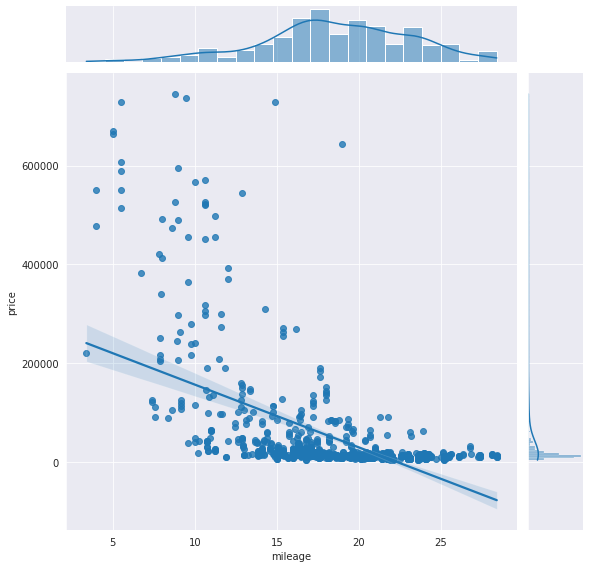

In [21]:
plt.figure(figsize=(10,8))
ax= fig.add_subplot()
sns.jointplot(data=df, x='mileage', y='price',kind= 'reg',ax=ax, palette='viridis',height=8,  ratio=7)
ax.text(.5,.7,'Relation between mileage and price', fontsize=18)
ax.set_xlabel('mileage', fontsize= 15);

It's looks like expensive cars tend to have worse mileage

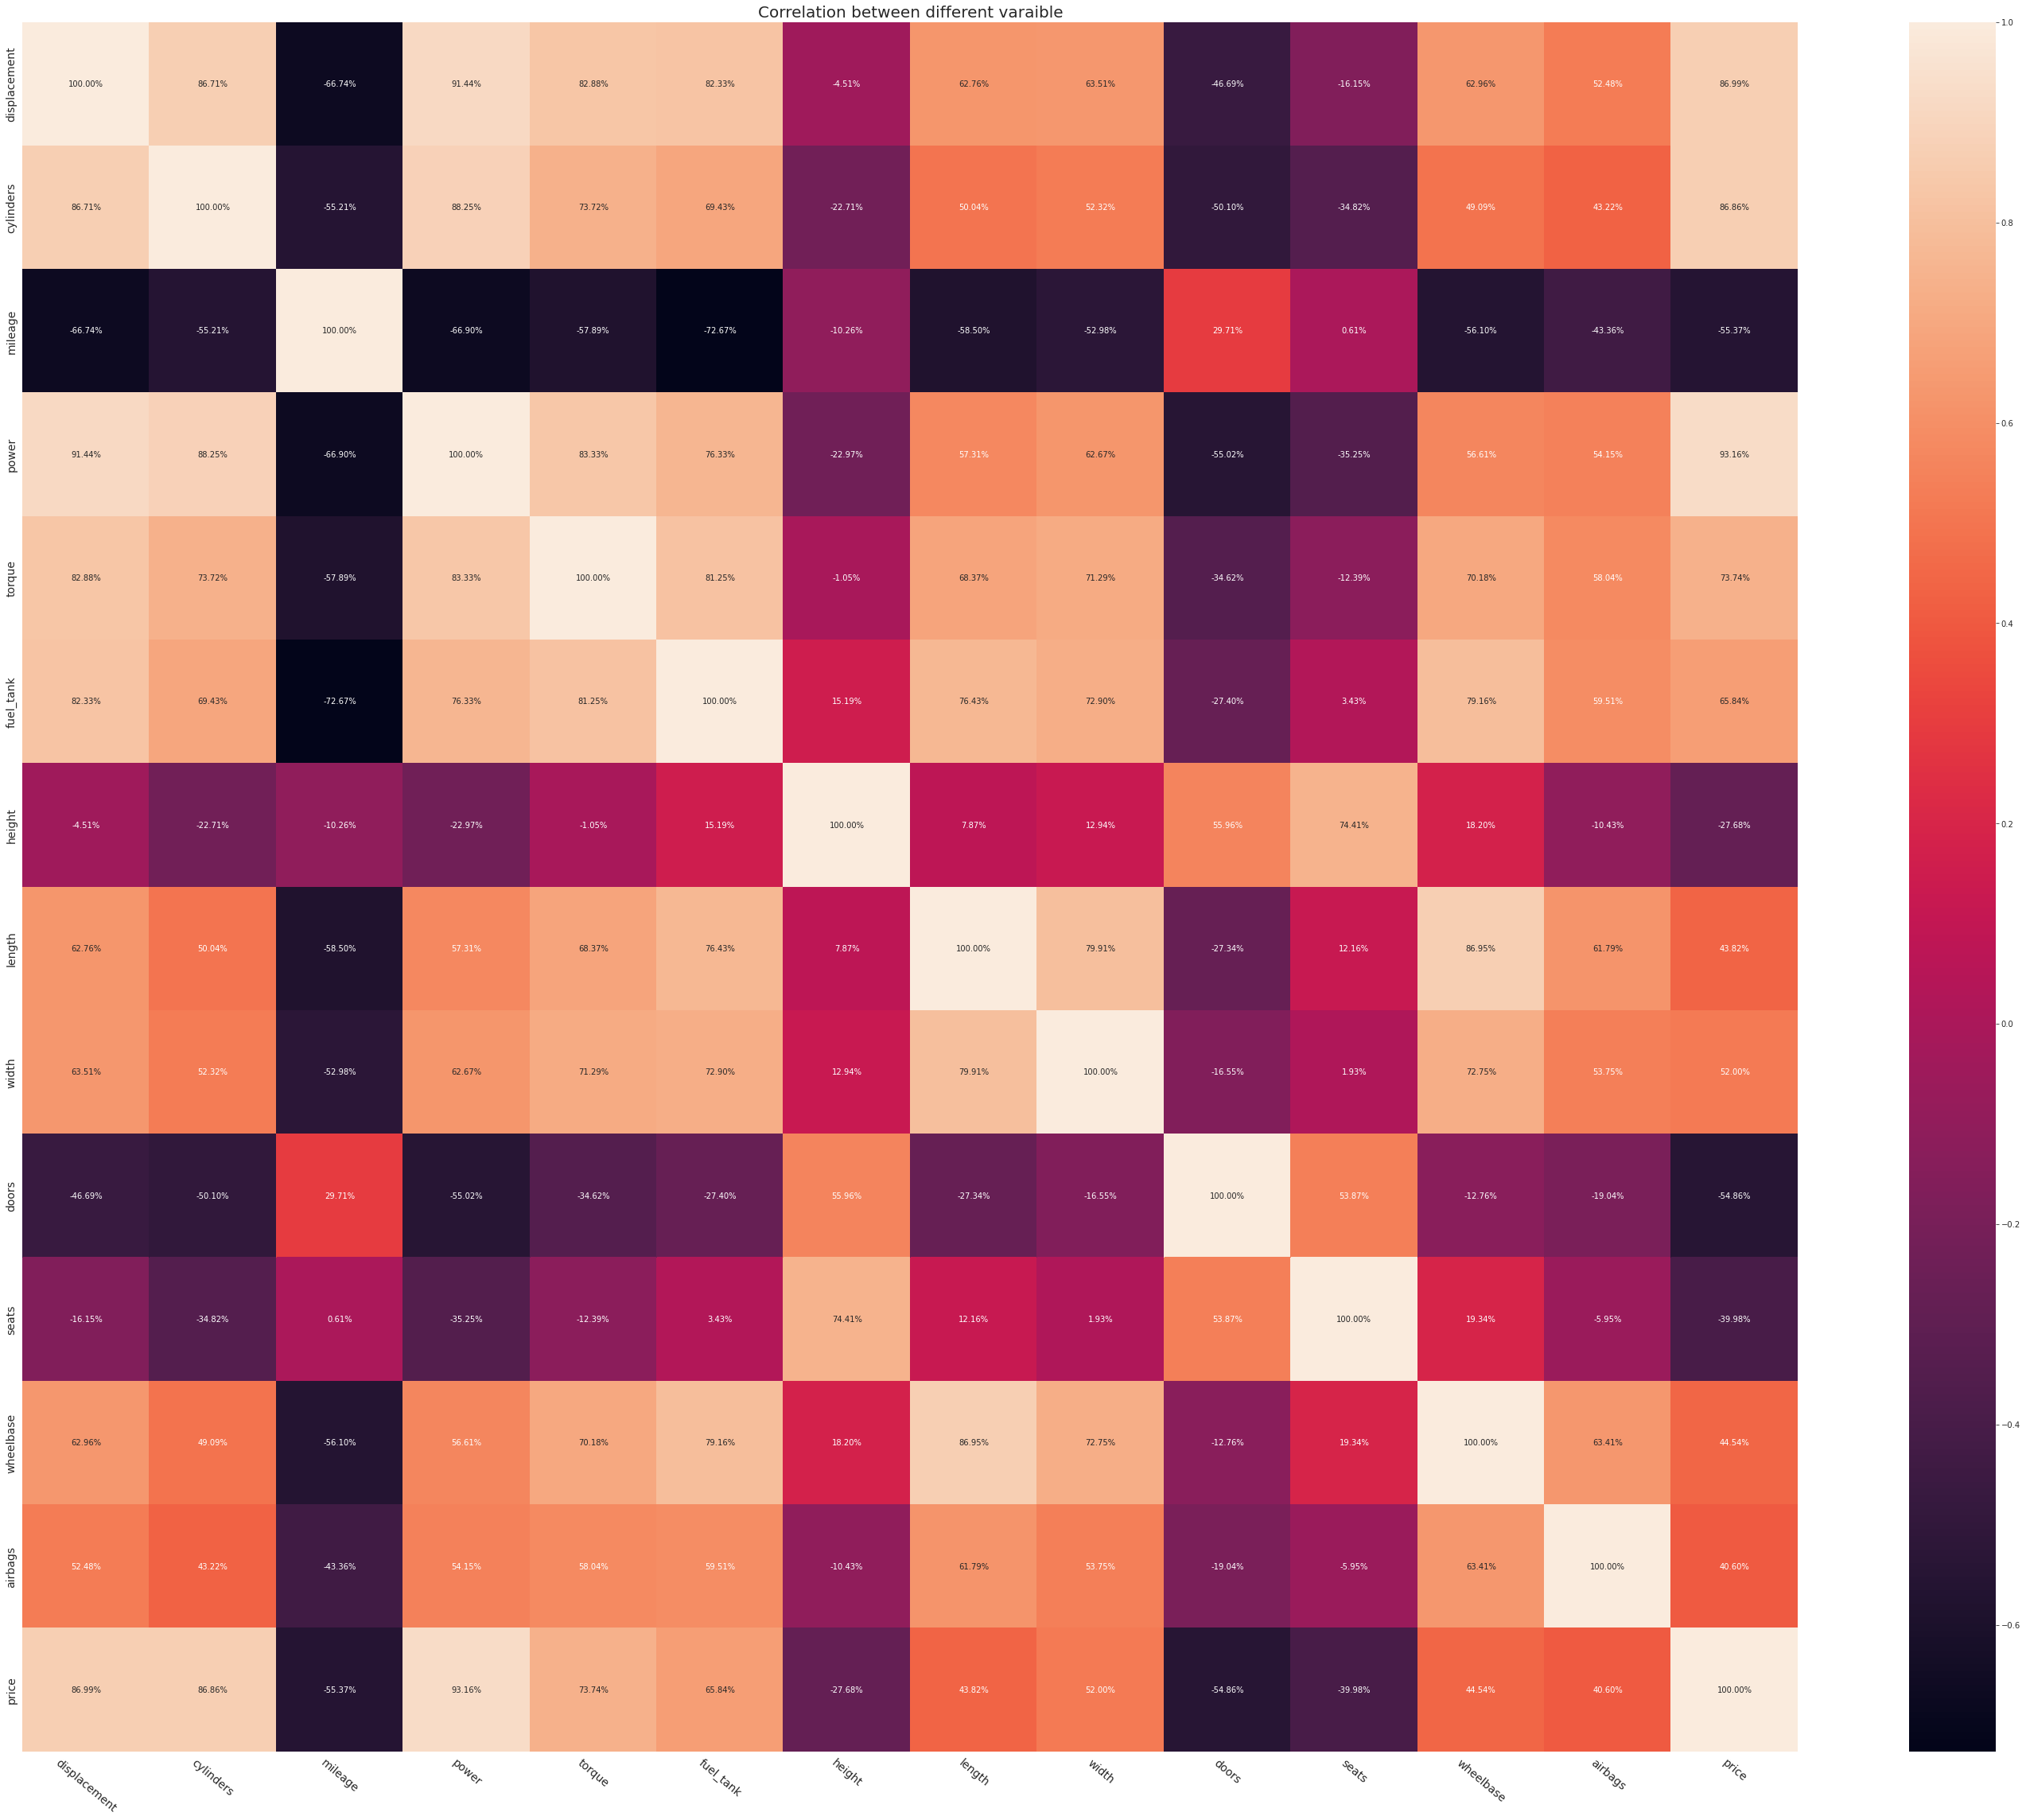

In [22]:
plt.figure(figsize=(50,40))
sns.heatmap(df.corr(),annot=True,fmt='.2%')
plt.title('Correlation between different varaible',fontsize=20)
plt.xticks(fontsize=14,rotation=320)
plt.yticks(fontsize=14);

In [23]:
df.corr()

,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
displacement,1.000000,0.867143,-0.667444,0.914424,0.828819,0.823269,-0.045095,0.627590,0.635063,-0.466925,-0.161533,0.629630,0.524808,0.869878
cylinders,0.867143,1.000000,-0.552145,0.882458,0.737185,0.694284,-0.227091,0.500427,0.523168,-0.501023,-0.348182,0.490869,0.432210,0.868627
mileage,-0.667444,-0.552145,1.000000,-0.668982,-0.578886,-0.726681,-0.102602,-0.584995,-0.529757,0.297087,0.006110,-0.561008,-0.433588,-0.553728
power,0.914424,0.882458,-0.668982,1.000000,0.833273,0.763310,-0.229689,0.573103,0.626671,-0.550160,-0.352487,0.566059,0.541501,0.931561
torque,0.828819,0.737185,-0.578886,0.833273,1.000000,0.812457,-0.010492,0.683731,0.712913,-0.346248,-0.123870,0.701764,0.580415,0.737356
fuel_tank,0.823269,0.694284,-0.726681,0.763310,0.812457,1.000000,0.151903,0.764325,0.729014,-0.274003,0.034317,0.791640,0.595092,0.658390
height,-0.045095,-0.227091,-0.102602,-0.229689,-0.010492,0.151903,1.000000,0.078707,0.129398,0.559601,0.744145,0.182036,-0.104321,-0.276826
length,0.627590,0.500427,-0.584995,0.573103,0.683731,0.764325,0.078707,1.000000,0.799120,-0.273403,0.121575,0.869473,0.617907,0.438164
width,0.635063,0.523168,-0.529757,0.626671,0.712913,0.729014,0.129398,0.799120,1.000000,-0.165546,0.019329,0.727521,0.537462,0.520027
doors,-0.466925,-0.501023,0.297087,-0.550160,-0.346248,-0.274003,0.559601,-0.273403,-0.165546,1.000000,0.538670,-0.127591,-0.190436,-0.548573


Now we check an extensive scatter plot grid of more numerical variable to investigate the relation in more detail

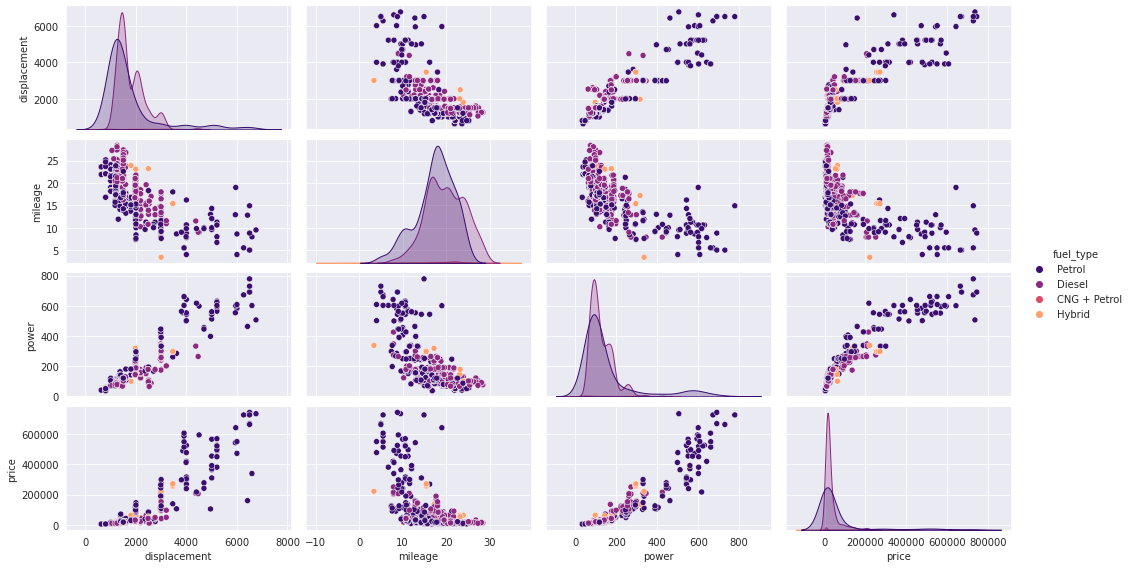

In [24]:
sns.pairplot(df,vars=['displacement','mileage','power','price'],hue='fuel_type',palette=sns.color_palette('magma',n_colors=4),diag_kind='kde',height=2,aspect=1.8);


In [25]:
fig=px.scatter_3d(df,x='power',z='price',y='mileage',color='make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();

# Clustering technique

In [26]:
df=df[df.price <60000]

# Now we choose a collection of features to build 8 clusters of cars

In [27]:
num_cols = [ i for i in df.columns if df[i].dtype != 'object']

# Fitting K-means clustering model with 10 clusters and adding a cluster column to the dataset

In [28]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=8,n_init=20,max_iter=400,random_state=0)
clusters=km.fit_predict(df[num_cols])
df['cluster']=clusters
df.cluster=(df.cluster + 1).astype('object')
df.sample(5)

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price,cluster
958,Maruti Suzuki,S-Cross,Maruti Suzuki S-Cross,1.3L Zeta,Crossover,Diesel,Injection,Manual,FWD (Front Wheel Drive),1248,4,23.65,88.77,200,48.0,1595.0,4300.0,1785.0,5,5,2600.0,2,14611,5
552,Ford,Ecosport,Ford Ecosport,1.5L Ti-Vct Trend,SUV,Petrol,Injection,Manual,FWD (Front Wheel Drive),1497,3,17.00,121.32,150,52.0,1647.0,3998.0,1765.0,5,5,2519.0,2,12194,5
266,Audi,Q3,Audi Q3,30 Tfsi Premium,SUV,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1395,4,16.90,147.95,250,64.0,1608.0,4388.0,1831.0,5,5,2603.0,6,48954,7
408,Mahindra,Kuv100 Nxt,Mahindra Kuv100 Nxt,K8 5Str,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1198,3,18.15,80.88,115,35.0,1655.0,3700.0,1735.0,5,5,2385.0,2,9620,1
915,Hyundai,Grand I10,Hyundai Grand I10,1.2 Kappa Vtvt Magna At,Hatchback,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1197,4,17.49,81.86,114,43.0,1520.0,3765.0,1660.0,5,5,2425.0,2,9132,1


In [29]:
# Now we check some scatter plots but with adding cluster.

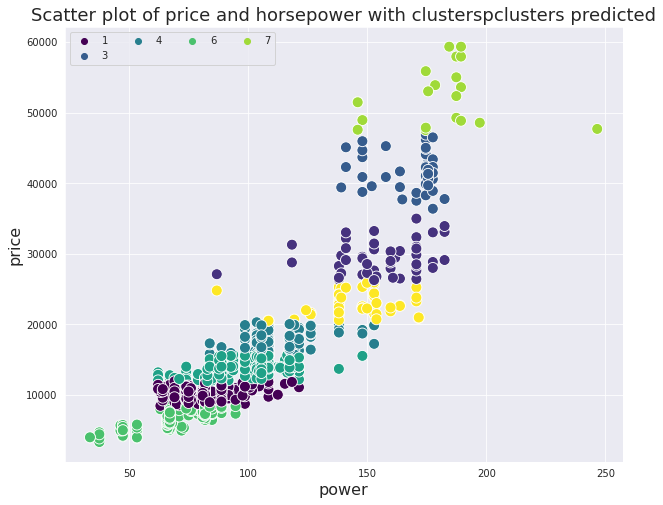

In [30]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, y='price', x='power',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of price and horsepower with clusterspclusters predicted', fontsize=18)
plt.xlabel('power',fontsize=16)
plt.ylabel('price',fontsize=16);

In [31]:
# We can see the the clusters are strongly affected by the price with clear speration between clusters but it's kind of blurry when it comes to power

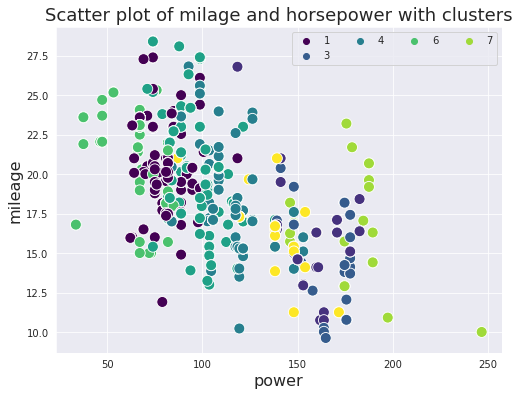

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='power', y='mileage',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of milage and horsepower with clusters', fontsize=18);
plt.xlabel('power',fontsize=16)
plt.ylabel('mileage',fontsize=16);

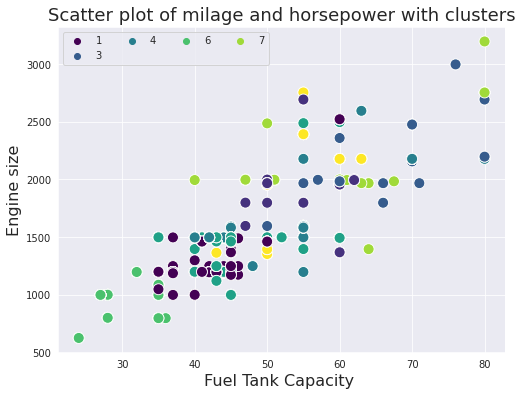

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='fuel_tank', y='displacement',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of milage and horsepower with clusters', fontsize=18);
plt.xlabel('Fuel Tank Capacity ',fontsize=16)
plt.ylabel('Engine size',fontsize=16);

In [34]:
# Now we make an interactive 3D scatter plot of price power, and mileage using also clusters

In [35]:
fig = px.scatter_3d(df, x='power', z='price', y='mileage',color='cluster',
                    height=700, width=800,color_discrete_sequence=sns.color_palette('colorblind',n_colors=8,desat=1).as_hex(),
                   title='price power, and mileage')
fig.show()

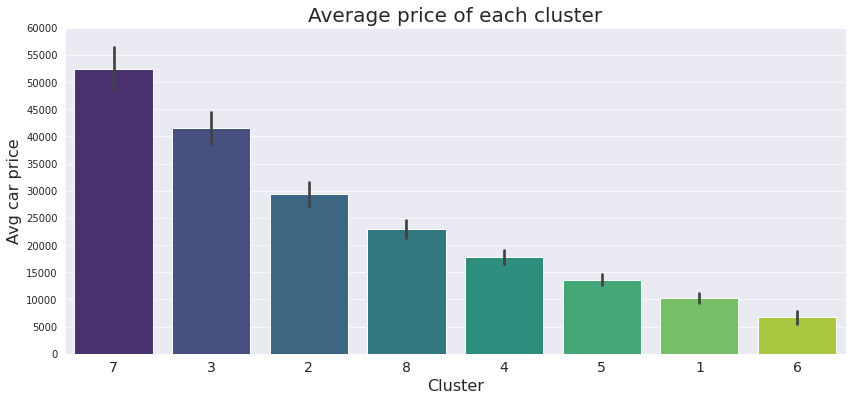

In [36]:
plt.figure(figsize=(14,6))
sns.barplot(data=df, x= 'cluster', ci= 'sd', y= 'price', palette='viridis',order=df.groupby('cluster')['price'].mean().sort_values(ascending=False).index);
plt.yticks([i for i in range(0,65000,5000)])
plt.title('Average price of each cluster',fontsize=20)
plt.xlabel('Cluster',fontsize=16)
plt.ylabel('Avg car price', fontsize=16)
plt.xticks(fontsize=14);

In [37]:
# As shown in the scatter plits earlier there is a clear seperation of clusters when it comes to prices¶

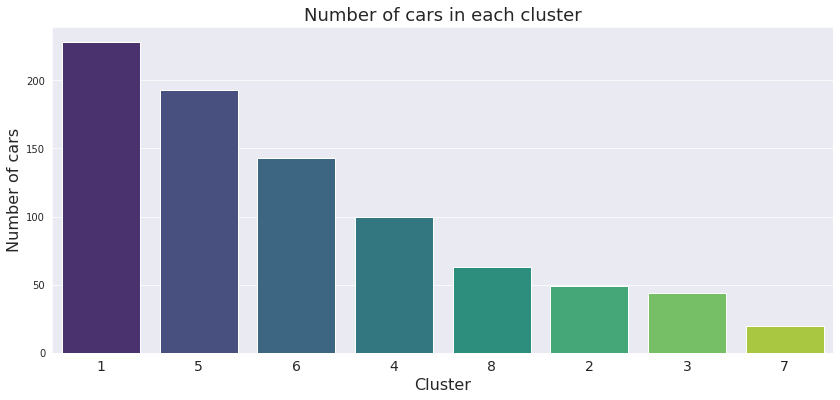

In [38]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x= 'cluster', palette='viridis',order=df.cluster.value_counts().index);
# plt.yticks([i for i in range(0,65000,5000)])
plt.title('Number of cars in each cluster',fontsize=18)
plt.xlabel('Cluster',fontsize=16)
plt.ylabel('Number of cars', fontsize=16)
plt.xticks(fontsize=14);

In [39]:
# We can generally say that even if clusters generated are not determinant yet we can see that they still can be useful

In [40]:
# Finding the potential strategic group

In [41]:
# first we find the cluster of the Toyota Corolla (and its variants)

In [42]:
df[df.model == 'Corolla Altis']

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price,cluster
734,Toyota,Corolla Altis,Toyota Corolla Altis,G Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,3,23030,8
735,Toyota,Corolla Altis,Toyota Corolla Altis,G At Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,3,25284,8
736,Toyota,Corolla Altis,Toyota Corolla Altis,Gl Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,7,26348,2
737,Toyota,Corolla Altis,Toyota Corolla Altis,Gl Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1364,4,21.0,86.80,205,43.0,1475.0,4620.0,1775.0,4,5,2700.0,3,27104,2
738,Toyota,Corolla Altis,Toyota Corolla Altis,G Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1364,4,21.0,86.80,205,43.0,1475.0,4620.0,1775.0,4,5,2700.0,3,24794,8
739,Toyota,Corolla Altis,Toyota Corolla Altis,Vl At Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1798,4,16.7,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,7,28266,2


In [44]:
# We found that the cluster of the corolla is cluster 8 and also cluster 2 we can now search these clusters and check what is intersing about it

In [48]:
df_c = df[df.cluster.isin([1,5])]
p_dic = {'Mahindra':'#46327e', 'Tata':'#46327e', 'Toyota':'orange',
         'Jeep':'#46327e', 'Honda':'#46327e', 'Kia':'#46327e',
         'Hyundai':'#46327e','Skoda':'#46327e'}
c_dic = {'Mahindra Scorpio':'#481769', 'Mahindra Xuv500':'#481769', 'Tata Hexa':'#481769',
       'Toyota Innova Crysta':'#481769', 'Jeep Compass':'#481769', 'Toyota Corolla Altis':'orange',
       'Honda Civic':'#481769', 'Kia Seltos':'#481769', 'Tata Safari Storme':'#481769',
       'Hyundai Elantra':'#481769', 'Hyundai Tucson':'#481769', 'Hyundai Creta':'#481769',
       'Tata Harrier':'#481769', 'Skoda Octavia':'#481769'}

In [49]:
df_c.sample(8)

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price,cluster
939,Maruti Suzuki,Baleno Rs,Maruti Suzuki Baleno Rs,Rs 1.0,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),998,3,21.40,100.60,150,37.0,1510.0,3995.0,1745.0,5,5,2520.0,2,11044,1
462,Tata,Zest,Tata Zest,Xm Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1248,4,23.00,73.97,190,44.0,1570.0,3995.0,1706.0,4,5,2470.0,0,10742,1
527,Fiat,Linea,Fiat Linea,Active Fire,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1368,4,15.70,112.44,207,45.0,1487.0,4596.0,1730.0,4,5,2603.0,0,10022,1
488,Maruti Suzuki,Gypsy,Maruti Suzuki Gypsy,Hard Top,SUV,Petrol,Injection,Manual,4WD,1298,4,11.90,78.91,103,40.0,1875.0,4010.0,1540.0,3,8,2375.0,0,8922,1
1119,Hyundai,Creta,Hyundai Creta,1.6 Vtvt E Plus,SUV,Petrol,Injection,Manual,FWD (Front Wheel Drive),1591,4,15.29,121.32,151,55.0,1630.0,4270.0,1780.0,5,5,2590.0,2,13999,5
173,Ford,Freestyle,Ford Freestyle,1.2L Ti-Vct Trend Plus,Crossover,Petrol,Injection,Manual,FWD (Front Wheel Drive),1194,3,19.00,94.69,120,42.0,1570.0,3954.0,1737.0,5,5,2490.0,2,9539,1
225,Fiat,Avventura,Fiat Avventura,Multijet Active,Crossover,Diesel,Injection,Manual,FWD (Front Wheel Drive),1248,4,20.50,91.73,209,45.0,1542.0,3989.0,1706.0,5,5,2510.0,0,9965,1
932,Maruti Suzuki,Ertiga,Maruti Suzuki Ertiga,Zxi Plus,MUV,Petrol,Injection,Manual,FWD (Front Wheel Drive),1462,4,19.34,101.59,130,45.0,1690.0,4395.0,1735.0,5,7,2740.0,2,13594,5


In [51]:
px.box(data_frame=df_c,x='car',y='price',height=500,  width=800,color='car', color_discrete_sequence=list(c_dic.values()))

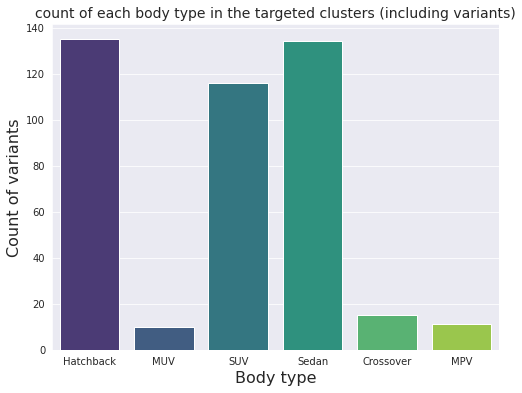

In [52]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_c,x='body_type',palette='viridis')
plt.xlabel('Body type',fontsize=16)
plt.ylabel('Count of variants',fontsize=16)
plt.title('count of each body type in the targeted clusters (including variants)',fontsize=14);